In [1]:
from deep_rl import *
import matplotlib.pyplot as plt

/network/home/penmetss/DeepRL/deeprl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/network/home/penmetss/DeepRL/deeprl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/network/home/penmetss/DeepRL/deeprl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/network/home/penmetss/DeepRL/deeprl/lib

In [2]:
def dsr_feature(**kwargs):
    generate_tag(kwargs)
    kwargs.setdefault('log_level', 0)
    config = Config()
    config.merge(kwargs)

    config.task_fn = lambda: Task(config.game)
    config.eval_env = config.task_fn()
    config.c = 0.1

    config.optimizer_fn = lambda params: torch.optim.RMSprop(params, 0.001)
    config.network_fn = lambda: SRNet(config.action_dim, SRIdentityBody(config.state_dim))
    # config.network_fn = lambda: DuelingNet(config.action_dim, FCBody(config.state_dim))
    # config.replay_fn = lambda: Replay(memory_size=int(1e4), batch_size=10)
    config.replay_fn = lambda: AsyncReplay(memory_size=int(1e4), batch_size=10)

    config.random_action_prob = LinearSchedule(1.0, 0.1, 1e4)
    config.discount = 0.99
    config.target_network_update_freq = 200
    config.exploration_steps = 1000
    # config.double_q = True
    config.double_q = False
    config.sgd_update_frequency = 4
    config.gradient_clip = 5
    config.eval_interval = int(5e3)
    config.max_steps = 1e5
    config.async_actor = False
    run_steps(DSRAgent(config))
    
# DQN
def dqn_feature(**kwargs):
    generate_tag(kwargs)
    kwargs.setdefault('log_level', 0)
    config = Config()
    config.merge(kwargs)

    config.task_fn = lambda: Task(config.game)
    config.eval_env = config.task_fn()

    config.optimizer_fn = lambda params: torch.optim.RMSprop(params, 0.001)
    config.network_fn = lambda: VanillaNet(config.action_dim, FCBody(config.state_dim))
    # config.network_fn = lambda: DuelingNet(config.action_dim, FCBody(config.state_dim))
    # config.replay_fn = lambda: Replay(memory_size=int(1e4), batch_size=10)
    config.replay_fn = lambda: AsyncReplay(memory_size=int(1e4), batch_size=10)

    config.random_action_prob = LinearSchedule(1.0, 0.1, 1e4)
    config.discount = 0.99
    config.target_network_update_freq = 200
    config.exploration_steps = 1000
    # config.double_q = True
    config.double_q = False
    config.sgd_update_frequency = 4
    config.gradient_clip = 5
    config.eval_interval = int(5e3)
    config.max_steps = 1e5
    config.async_actor = False
    run_steps(DQNAgent(config))

In [3]:
mkdir('log')
mkdir('tf_log')
set_one_thread()
random_seed()
select_device(-1)

In [4]:
# game = 'CartPole-v0'
game = 'FourRooms'
dsr_feature(game=game)


2020-03-01 15:58:17,423 - root - INFO: steps 0, 322638769.23 steps/s
2020-03-01 15:58:18,034 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-03-01 15:58:18,240 - root - INFO: steps 8, episodic_return_train -8
2020-03-01 15:58:18,329 - root - INFO: steps 208, episodic_return_train -200
2020-03-01 15:58:18,418 - root - INFO: steps 408, episodic_return_train -200
2020-03-01 15:58:18,505 - root - INFO: steps 608, episodic_return_train -200
2020-03-01 15:58:18,586 - root - INFO: steps 808, episodic_return_train -200
2020-03-01 15:58:18,660 - root - INFO: steps 1000, 810.32 steps/s
2020-03-01 15:58:18,707 - root - INFO: steps 1008, episodic_return_train -200
2020-03-01 15:58:19,032 - root - INFO: steps 1208, episodic_return_train -200
2020-03-01 15:58:19,237 - root - INFO: steps 1339, episodic_return_train -130
2020-03-01 15:58:19,580 - root - INFO: steps 1539, episodic_return_train -200
2020-03-01 15:58:19,920 - root - INFO: steps 1739, episodic_return_train -200
2020-03-01 

2020-03-01 15:58:36,161 - root - INFO: steps 11479, episodic_return_train -140
2020-03-01 15:58:36,463 - root - INFO: steps 11679, episodic_return_train -200
2020-03-01 15:58:36,786 - root - INFO: steps 11879, episodic_return_train -200
2020-03-01 15:58:36,976 - root - INFO: steps 12000, 637.37 steps/s
2020-03-01 15:58:37,088 - root - INFO: steps 12079, episodic_return_train -200
2020-03-01 15:58:37,095 - root - INFO: steps 12082, episodic_return_train -2
2020-03-01 15:58:37,193 - root - INFO: steps 12146, episodic_return_train -63
2020-03-01 15:58:37,517 - root - INFO: steps 12346, episodic_return_train -200
2020-03-01 15:58:37,586 - root - INFO: steps 12385, episodic_return_train -38
2020-03-01 15:58:37,883 - root - INFO: steps 12585, episodic_return_train -200
2020-03-01 15:58:37,897 - root - INFO: steps 12593, episodic_return_train -7
2020-03-01 15:58:37,929 - root - INFO: steps 12615, episodic_return_train -21
2020-03-01 15:58:37,943 - root - INFO: steps 12621, episodic_return_tra

2020-03-01 15:58:43,213 - root - INFO: steps 15761, episodic_return_train -76
2020-03-01 15:58:43,215 - root - INFO: steps 15763, episodic_return_train -1
2020-03-01 15:58:43,246 - root - INFO: steps 15777, episodic_return_train -13
2020-03-01 15:58:43,272 - root - INFO: steps 15794, episodic_return_train -16
2020-03-01 15:58:43,299 - root - INFO: steps 15808, episodic_return_train -13
2020-03-01 15:58:43,315 - root - INFO: steps 15819, episodic_return_train -10
2020-03-01 15:58:43,367 - root - INFO: steps 15844, episodic_return_train -24
2020-03-01 15:58:43,369 - root - INFO: steps 15846, episodic_return_train -1
2020-03-01 15:58:43,402 - root - INFO: steps 15860, episodic_return_train -13
2020-03-01 15:58:43,445 - root - INFO: steps 15885, episodic_return_train -24
2020-03-01 15:58:43,479 - root - INFO: steps 15902, episodic_return_train -16
2020-03-01 15:58:43,491 - root - INFO: steps 15907, episodic_return_train -4
2020-03-01 15:58:43,546 - root - INFO: steps 15939, episodic_return

2020-03-01 15:58:46,115 - root - INFO: steps 17350, episodic_return_train -5
2020-03-01 15:58:46,130 - root - INFO: steps 17357, episodic_return_train -6
2020-03-01 15:58:46,143 - root - INFO: steps 17364, episodic_return_train -6
2020-03-01 15:58:46,154 - root - INFO: steps 17369, episodic_return_train -4
2020-03-01 15:58:46,184 - root - INFO: steps 17383, episodic_return_train -13
2020-03-01 15:58:46,219 - root - INFO: steps 17404, episodic_return_train -20
2020-03-01 15:58:46,318 - root - INFO: steps 17465, episodic_return_train -60
2020-03-01 15:58:46,378 - root - INFO: steps 17503, episodic_return_train -37
2020-03-01 15:58:46,404 - root - INFO: steps 17518, episodic_return_train -14
2020-03-01 15:58:46,418 - root - INFO: steps 17526, episodic_return_train -7
2020-03-01 15:58:46,439 - root - INFO: steps 17538, episodic_return_train -11
2020-03-01 15:58:46,447 - root - INFO: steps 17543, episodic_return_train -4
2020-03-01 15:58:46,540 - root - INFO: steps 17600, episodic_return_tr

2020-03-01 15:58:48,903 - root - INFO: steps 18912, episodic_return_train -16
2020-03-01 15:58:48,915 - root - INFO: steps 18917, episodic_return_train -4
2020-03-01 15:58:48,956 - root - INFO: steps 18941, episodic_return_train -23
2020-03-01 15:58:48,998 - root - INFO: steps 18966, episodic_return_train -24
2020-03-01 15:58:49,007 - root - INFO: steps 18970, episodic_return_train -3
2020-03-01 15:58:49,034 - root - INFO: steps 18985, episodic_return_train -14
2020-03-01 15:58:49,058 - root - INFO: steps 19000, 563.27 steps/s
2020-03-01 15:58:49,087 - root - INFO: steps 19016, episodic_return_train -30
2020-03-01 15:58:49,088 - root - INFO: steps 19019, episodic_return_train -2
2020-03-01 15:58:49,101 - root - INFO: steps 19026, episodic_return_train -6
2020-03-01 15:58:49,108 - root - INFO: steps 19030, episodic_return_train -3
2020-03-01 15:58:49,137 - root - INFO: steps 19048, episodic_return_train -17
2020-03-01 15:58:49,149 - root - INFO: steps 19059, episodic_return_train -10
20

2020-03-01 15:58:51,697 - root - INFO: steps 20377, episodic_return_train -5
2020-03-01 15:58:51,704 - root - INFO: steps 20383, episodic_return_train -5
2020-03-01 15:58:51,716 - root - INFO: steps 20387, episodic_return_train -3
2020-03-01 15:58:51,730 - root - INFO: steps 20395, episodic_return_train -7
2020-03-01 15:58:51,763 - root - INFO: steps 20408, episodic_return_train -12
2020-03-01 15:58:51,784 - root - INFO: steps 20421, episodic_return_train -12
2020-03-01 15:58:51,818 - root - INFO: steps 20441, episodic_return_train -19
2020-03-01 15:58:51,838 - root - INFO: steps 20451, episodic_return_train -9
2020-03-01 15:58:51,859 - root - INFO: steps 20461, episodic_return_train -9
2020-03-01 15:58:51,933 - root - INFO: steps 20504, episodic_return_train -42
2020-03-01 15:58:51,953 - root - INFO: steps 20517, episodic_return_train -12
2020-03-01 15:58:51,973 - root - INFO: steps 20529, episodic_return_train -11
2020-03-01 15:58:51,986 - root - INFO: steps 20536, episodic_return_tr

2020-03-01 15:58:54,500 - root - INFO: steps 21970, episodic_return_train -5
2020-03-01 15:58:54,512 - root - INFO: steps 21972, episodic_return_train -1
2020-03-01 15:58:54,537 - root - INFO: steps 21985, episodic_return_train -12
2020-03-01 15:58:54,562 - root - INFO: steps 22000, 557.79 steps/s
2020-03-01 15:58:54,577 - root - INFO: steps 22004, episodic_return_train -18
2020-03-01 15:58:54,609 - root - INFO: steps 22025, episodic_return_train -20
2020-03-01 15:58:54,624 - root - INFO: steps 22035, episodic_return_train -9
2020-03-01 15:58:54,632 - root - INFO: steps 22038, episodic_return_train -2
2020-03-01 15:58:54,658 - root - INFO: steps 22053, episodic_return_train -14
2020-03-01 15:58:54,679 - root - INFO: steps 22062, episodic_return_train -8
2020-03-01 15:58:54,728 - root - INFO: steps 22084, episodic_return_train -21
2020-03-01 15:58:54,772 - root - INFO: steps 22109, episodic_return_train -24
2020-03-01 15:58:54,840 - root - INFO: steps 22149, episodic_return_train -39
20

2020-03-01 15:58:57,289 - root - INFO: steps 23549, episodic_return_train -21
2020-03-01 15:58:57,327 - root - INFO: steps 23572, episodic_return_train -22
2020-03-01 15:58:57,348 - root - INFO: steps 23583, episodic_return_train -10
2020-03-01 15:58:57,399 - root - INFO: steps 23610, episodic_return_train -26
2020-03-01 15:58:57,409 - root - INFO: steps 23614, episodic_return_train -3
2020-03-01 15:58:57,441 - root - INFO: steps 23626, episodic_return_train -11
2020-03-01 15:58:57,499 - root - INFO: steps 23658, episodic_return_train -31
2020-03-01 15:58:57,531 - root - INFO: steps 23674, episodic_return_train -15
2020-03-01 15:58:57,575 - root - INFO: steps 23694, episodic_return_train -19
2020-03-01 15:58:57,628 - root - INFO: steps 23724, episodic_return_train -29
2020-03-01 15:58:57,630 - root - INFO: steps 23725, episodic_return_train 0
2020-03-01 15:58:57,652 - root - INFO: steps 23739, episodic_return_train -13
2020-03-01 15:58:57,686 - root - INFO: steps 23758, episodic_return

2020-03-01 15:59:00,114 - root - INFO: steps 25050, episodic_return_train -4
2020-03-01 15:59:00,134 - root - INFO: steps 25057, episodic_return_train -6
2020-03-01 15:59:00,168 - root - INFO: steps 25077, episodic_return_train -19
2020-03-01 15:59:00,178 - root - INFO: steps 25081, episodic_return_train -3
2020-03-01 15:59:00,200 - root - INFO: steps 25094, episodic_return_train -12
2020-03-01 15:59:00,245 - root - INFO: steps 25122, episodic_return_train -27
2020-03-01 15:59:00,271 - root - INFO: steps 25136, episodic_return_train -13
2020-03-01 15:59:00,297 - root - INFO: steps 25150, episodic_return_train -13
2020-03-01 15:59:00,328 - root - INFO: steps 25168, episodic_return_train -17
2020-03-01 15:59:00,341 - root - INFO: steps 25178, episodic_return_train -9
2020-03-01 15:59:00,367 - root - INFO: steps 25195, episodic_return_train -16
2020-03-01 15:59:00,388 - root - INFO: steps 25204, episodic_return_train -8
2020-03-01 15:59:00,401 - root - INFO: steps 25210, episodic_return_t

2020-03-01 15:59:02,869 - root - INFO: steps 26562, episodic_return_train -3
2020-03-01 15:59:02,910 - root - INFO: steps 26580, episodic_return_train -17
2020-03-01 15:59:02,919 - root - INFO: steps 26586, episodic_return_train -5
2020-03-01 15:59:02,927 - root - INFO: steps 26589, episodic_return_train -2
2020-03-01 15:59:02,969 - root - INFO: steps 26613, episodic_return_train -23
2020-03-01 15:59:02,991 - root - INFO: steps 26626, episodic_return_train -12
2020-03-01 15:59:03,002 - root - INFO: steps 26629, episodic_return_train -2
2020-03-01 15:59:03,033 - root - INFO: steps 26645, episodic_return_train -15
2020-03-01 15:59:03,052 - root - INFO: steps 26658, episodic_return_train -12
2020-03-01 15:59:03,070 - root - INFO: steps 26664, episodic_return_train -5
2020-03-01 15:59:03,105 - root - INFO: steps 26684, episodic_return_train -19
2020-03-01 15:59:03,125 - root - INFO: steps 26697, episodic_return_train -12
2020-03-01 15:59:03,177 - root - INFO: steps 26730, episodic_return_t

2020-03-01 15:59:05,828 - root - INFO: steps 28199, episodic_return_train -10
2020-03-01 15:59:05,861 - root - INFO: steps 28216, episodic_return_train -16
2020-03-01 15:59:05,881 - root - INFO: steps 28224, episodic_return_train -7
2020-03-01 15:59:05,910 - root - INFO: steps 28243, episodic_return_train -18
2020-03-01 15:59:05,964 - root - INFO: steps 28273, episodic_return_train -29
2020-03-01 15:59:05,979 - root - INFO: steps 28283, episodic_return_train -9
2020-03-01 15:59:06,023 - root - INFO: steps 28309, episodic_return_train -25
2020-03-01 15:59:06,058 - root - INFO: steps 28327, episodic_return_train -17
2020-03-01 15:59:06,071 - root - INFO: steps 28331, episodic_return_train -3
2020-03-01 15:59:06,108 - root - INFO: steps 28350, episodic_return_train -18
2020-03-01 15:59:06,123 - root - INFO: steps 28359, episodic_return_train -8
2020-03-01 15:59:06,150 - root - INFO: steps 28372, episodic_return_train -12
2020-03-01 15:59:06,158 - root - INFO: steps 28377, episodic_return_

2020-03-01 15:59:08,466 - root - INFO: steps 29671, episodic_return_train -4
2020-03-01 15:59:08,491 - root - INFO: steps 29687, episodic_return_train -15
2020-03-01 15:59:08,504 - root - INFO: steps 29693, episodic_return_train -5
2020-03-01 15:59:08,551 - root - INFO: steps 29718, episodic_return_train -24
2020-03-01 15:59:08,565 - root - INFO: steps 29726, episodic_return_train -7
2020-03-01 15:59:08,587 - root - INFO: steps 29739, episodic_return_train -12
2020-03-01 15:59:08,616 - root - INFO: steps 29753, episodic_return_train -13
2020-03-01 15:59:08,625 - root - INFO: steps 29756, episodic_return_train -2
2020-03-01 15:59:08,640 - root - INFO: steps 29766, episodic_return_train -9
2020-03-01 15:59:08,664 - root - INFO: steps 29779, episodic_return_train -12
2020-03-01 15:59:08,674 - root - INFO: steps 29781, episodic_return_train -1
2020-03-01 15:59:08,725 - root - INFO: steps 29813, episodic_return_train -31
2020-03-01 15:59:08,806 - root - INFO: steps 29857, episodic_return_tr

2020-03-01 15:59:11,132 - root - INFO: steps 31085, episodic_return_train -32
2020-03-01 15:59:11,161 - root - INFO: steps 31099, episodic_return_train -13
2020-03-01 15:59:11,183 - root - INFO: steps 31110, episodic_return_train -10
2020-03-01 15:59:11,206 - root - INFO: steps 31121, episodic_return_train -10
2020-03-01 15:59:11,216 - root - INFO: steps 31125, episodic_return_train -3
2020-03-01 15:59:11,260 - root - INFO: steps 31151, episodic_return_train -25
2020-03-01 15:59:11,284 - root - INFO: steps 31163, episodic_return_train -11
2020-03-01 15:59:11,307 - root - INFO: steps 31172, episodic_return_train -8
2020-03-01 15:59:11,316 - root - INFO: steps 31179, episodic_return_train -6
2020-03-01 15:59:11,353 - root - INFO: steps 31196, episodic_return_train -16
2020-03-01 15:59:11,377 - root - INFO: steps 31208, episodic_return_train -11
2020-03-01 15:59:11,378 - root - INFO: steps 31211, episodic_return_train -2
2020-03-01 15:59:11,388 - root - INFO: steps 31213, episodic_return_

2020-03-01 15:59:14,209 - root - INFO: steps 32728, episodic_return_train -4
2020-03-01 15:59:14,225 - root - INFO: steps 32737, episodic_return_train -8
2020-03-01 15:59:14,247 - root - INFO: steps 32750, episodic_return_train -12
2020-03-01 15:59:14,269 - root - INFO: steps 32762, episodic_return_train -11
2020-03-01 15:59:14,277 - root - INFO: steps 32766, episodic_return_train -3
2020-03-01 15:59:14,306 - root - INFO: steps 32780, episodic_return_train -13
2020-03-01 15:59:14,314 - root - INFO: steps 32785, episodic_return_train -4
2020-03-01 15:59:14,351 - root - INFO: steps 32805, episodic_return_train -19
2020-03-01 15:59:14,359 - root - INFO: steps 32810, episodic_return_train -4
2020-03-01 15:59:14,434 - root - INFO: steps 32847, episodic_return_train -36
2020-03-01 15:59:14,448 - root - INFO: steps 32851, episodic_return_train -3
2020-03-01 15:59:14,495 - root - INFO: steps 32873, episodic_return_train -21
2020-03-01 15:59:14,516 - root - INFO: steps 32884, episodic_return_tr

2020-03-01 15:59:17,002 - root - INFO: steps 34180, episodic_return_train -5
2020-03-01 15:59:17,038 - root - INFO: steps 34202, episodic_return_train -21
2020-03-01 15:59:17,063 - root - INFO: steps 34217, episodic_return_train -14
2020-03-01 15:59:17,105 - root - INFO: steps 34236, episodic_return_train -18
2020-03-01 15:59:17,114 - root - INFO: steps 34242, episodic_return_train -5
2020-03-01 15:59:17,116 - root - INFO: steps 34243, episodic_return_train 0
2020-03-01 15:59:17,139 - root - INFO: steps 34255, episodic_return_train -11
2020-03-01 15:59:17,147 - root - INFO: steps 34259, episodic_return_train -3
2020-03-01 15:59:17,163 - root - INFO: steps 34265, episodic_return_train -5
2020-03-01 15:59:17,173 - root - INFO: steps 34270, episodic_return_train -4
2020-03-01 15:59:17,223 - root - INFO: steps 34297, episodic_return_train -26
2020-03-01 15:59:17,281 - root - INFO: steps 34330, episodic_return_train -32
2020-03-01 15:59:17,337 - root - INFO: steps 34362, episodic_return_tra

2020-03-01 15:59:19,539 - root - INFO: steps 35509, episodic_return_train -7
2020-03-01 15:59:19,560 - root - INFO: steps 35520, episodic_return_train -10
2020-03-01 15:59:19,575 - root - INFO: steps 35528, episodic_return_train -7
2020-03-01 15:59:19,585 - root - INFO: steps 35535, episodic_return_train -6
2020-03-01 15:59:19,606 - root - INFO: steps 35544, episodic_return_train -8
2020-03-01 15:59:19,634 - root - INFO: steps 35561, episodic_return_train -16
2020-03-01 15:59:19,650 - root - INFO: steps 35571, episodic_return_train -9
2020-03-01 15:59:19,663 - root - INFO: steps 35578, episodic_return_train -6
2020-03-01 15:59:19,695 - root - INFO: steps 35593, episodic_return_train -14
2020-03-01 15:59:19,724 - root - INFO: steps 35609, episodic_return_train -15
2020-03-01 15:59:19,748 - root - INFO: steps 35622, episodic_return_train -12
2020-03-01 15:59:19,784 - root - INFO: steps 35642, episodic_return_train -19
2020-03-01 15:59:19,792 - root - INFO: steps 35644, episodic_return_tr

2020-03-01 15:59:22,348 - root - INFO: steps 36990, episodic_return_train -5
2020-03-01 15:59:22,368 - root - INFO: steps 37000, 519.22 steps/s
2020-03-01 15:59:22,392 - root - INFO: steps 37008, episodic_return_train -17
2020-03-01 15:59:22,418 - root - INFO: steps 37024, episodic_return_train -15
2020-03-01 15:59:22,435 - root - INFO: steps 37034, episodic_return_train -9
2020-03-01 15:59:22,489 - root - INFO: steps 37062, episodic_return_train -27
2020-03-01 15:59:22,529 - root - INFO: steps 37081, episodic_return_train -18
2020-03-01 15:59:22,560 - root - INFO: steps 37096, episodic_return_train -14
2020-03-01 15:59:22,588 - root - INFO: steps 37112, episodic_return_train -15
2020-03-01 15:59:22,599 - root - INFO: steps 37117, episodic_return_train -4
2020-03-01 15:59:22,613 - root - INFO: steps 37126, episodic_return_train -8
2020-03-01 15:59:22,622 - root - INFO: steps 37129, episodic_return_train -2
2020-03-01 15:59:22,639 - root - INFO: steps 37136, episodic_return_train -6
202

2020-03-01 15:59:25,365 - root - INFO: steps 38589, episodic_return_train -9
2020-03-01 15:59:25,376 - root - INFO: steps 38592, episodic_return_train -2
2020-03-01 15:59:25,404 - root - INFO: steps 38608, episodic_return_train -15
2020-03-01 15:59:25,418 - root - INFO: steps 38617, episodic_return_train -8
2020-03-01 15:59:25,438 - root - INFO: steps 38627, episodic_return_train -9
2020-03-01 15:59:25,453 - root - INFO: steps 38633, episodic_return_train -5
2020-03-01 15:59:25,475 - root - INFO: steps 38647, episodic_return_train -13
2020-03-01 15:59:25,490 - root - INFO: steps 38652, episodic_return_train -4
2020-03-01 15:59:25,505 - root - INFO: steps 38663, episodic_return_train -10
2020-03-01 15:59:25,558 - root - INFO: steps 38690, episodic_return_train -26
2020-03-01 15:59:25,566 - root - INFO: steps 38694, episodic_return_train -3
2020-03-01 15:59:25,604 - root - INFO: steps 38712, episodic_return_train -17
2020-03-01 15:59:25,619 - root - INFO: steps 38723, episodic_return_tra

2020-03-01 15:59:28,391 - root - INFO: steps 40148, episodic_return_train -21
2020-03-01 15:59:28,429 - root - INFO: steps 40169, episodic_return_train -20
2020-03-01 15:59:28,441 - root - INFO: steps 40173, episodic_return_train -3
2020-03-01 15:59:28,461 - root - INFO: steps 40187, episodic_return_train -13
2020-03-01 15:59:28,487 - root - INFO: steps 40199, episodic_return_train -11
2020-03-01 15:59:28,494 - root - INFO: steps 40203, episodic_return_train -3
2020-03-01 15:59:28,519 - root - INFO: steps 40215, episodic_return_train -11
2020-03-01 15:59:28,534 - root - INFO: steps 40223, episodic_return_train -7
2020-03-01 15:59:28,584 - root - INFO: steps 40250, episodic_return_train -26
2020-03-01 15:59:28,600 - root - INFO: steps 40256, episodic_return_train -5
2020-03-01 15:59:28,656 - root - INFO: steps 40286, episodic_return_train -29
2020-03-01 15:59:28,671 - root - INFO: steps 40292, episodic_return_train -5
2020-03-01 15:59:28,681 - root - INFO: steps 40298, episodic_return_t

2020-03-01 15:59:31,121 - root - INFO: steps 41572, episodic_return_train -17
2020-03-01 15:59:31,143 - root - INFO: steps 41585, episodic_return_train -12
2020-03-01 15:59:31,172 - root - INFO: steps 41603, episodic_return_train -17
2020-03-01 15:59:31,221 - root - INFO: steps 41630, episodic_return_train -26
2020-03-01 15:59:31,230 - root - INFO: steps 41632, episodic_return_train -1
2020-03-01 15:59:31,254 - root - INFO: steps 41644, episodic_return_train -11
2020-03-01 15:59:31,291 - root - INFO: steps 41665, episodic_return_train -20
2020-03-01 15:59:31,350 - root - INFO: steps 41696, episodic_return_train -30
2020-03-01 15:59:31,370 - root - INFO: steps 41706, episodic_return_train -9
2020-03-01 15:59:31,408 - root - INFO: steps 41726, episodic_return_train -19
2020-03-01 15:59:31,454 - root - INFO: steps 41758, episodic_return_train -31
2020-03-01 15:59:31,478 - root - INFO: steps 41774, episodic_return_train -15
2020-03-01 15:59:31,490 - root - INFO: steps 41779, episodic_retur

2020-03-01 15:59:34,048 - root - INFO: steps 43129, episodic_return_train -14
2020-03-01 15:59:34,057 - root - INFO: steps 43135, episodic_return_train -5
2020-03-01 15:59:34,101 - root - INFO: steps 43158, episodic_return_train -22
2020-03-01 15:59:34,123 - root - INFO: steps 43168, episodic_return_train -9
2020-03-01 15:59:34,131 - root - INFO: steps 43172, episodic_return_train -3
2020-03-01 15:59:34,160 - root - INFO: steps 43188, episodic_return_train -15
2020-03-01 15:59:34,168 - root - INFO: steps 43194, episodic_return_train -5
2020-03-01 15:59:34,203 - root - INFO: steps 43215, episodic_return_train -20
2020-03-01 15:59:34,218 - root - INFO: steps 43221, episodic_return_train -5
2020-03-01 15:59:34,226 - root - INFO: steps 43226, episodic_return_train -4
2020-03-01 15:59:34,260 - root - INFO: steps 43244, episodic_return_train -17
2020-03-01 15:59:34,268 - root - INFO: steps 43248, episodic_return_train -3
2020-03-01 15:59:34,276 - root - INFO: steps 43254, episodic_return_tra

2020-03-01 15:59:36,965 - root - INFO: steps 44675, episodic_return_train -24
2020-03-01 15:59:37,017 - root - INFO: steps 44700, episodic_return_train -24
2020-03-01 15:59:37,062 - root - INFO: steps 44725, episodic_return_train -24
2020-03-01 15:59:37,071 - root - INFO: steps 44728, episodic_return_train -2
2020-03-01 15:59:37,086 - root - INFO: steps 44736, episodic_return_train -7
2020-03-01 15:59:37,108 - root - INFO: steps 44751, episodic_return_train -14
2020-03-01 15:59:37,167 - root - INFO: steps 44780, episodic_return_train -28
2020-03-01 15:59:37,208 - root - INFO: steps 44807, episodic_return_train -26
2020-03-01 15:59:37,236 - root - INFO: steps 44816, episodic_return_train -8
2020-03-01 15:59:37,256 - root - INFO: steps 44831, episodic_return_train -14
2020-03-01 15:59:37,270 - root - INFO: steps 44836, episodic_return_train -4
2020-03-01 15:59:37,285 - root - INFO: steps 44847, episodic_return_train -10
2020-03-01 15:59:37,354 - root - INFO: steps 44885, episodic_return_

2020-03-01 15:59:39,966 - root - INFO: steps 46262, episodic_return_train -1
2020-03-01 15:59:40,010 - root - INFO: steps 46280, episodic_return_train -17
2020-03-01 15:59:40,012 - root - INFO: steps 46281, episodic_return_train 0
2020-03-01 15:59:40,043 - root - INFO: steps 46295, episodic_return_train -13
2020-03-01 15:59:40,061 - root - INFO: steps 46303, episodic_return_train -7
2020-03-01 15:59:40,075 - root - INFO: steps 46308, episodic_return_train -4
2020-03-01 15:59:40,089 - root - INFO: steps 46319, episodic_return_train -10
2020-03-01 15:59:40,109 - root - INFO: steps 46329, episodic_return_train -9
2020-03-01 15:59:40,128 - root - INFO: steps 46343, episodic_return_train -13
2020-03-01 15:59:40,167 - root - INFO: steps 46363, episodic_return_train -19
2020-03-01 15:59:40,211 - root - INFO: steps 46387, episodic_return_train -23
2020-03-01 15:59:40,248 - root - INFO: steps 46404, episodic_return_train -16
2020-03-01 15:59:40,262 - root - INFO: steps 46412, episodic_return_tr

2020-03-01 15:59:42,638 - root - INFO: steps 47647, episodic_return_train -1
2020-03-01 15:59:42,673 - root - INFO: steps 47660, episodic_return_train -12
2020-03-01 15:59:42,687 - root - INFO: steps 47671, episodic_return_train -10
2020-03-01 15:59:42,721 - root - INFO: steps 47689, episodic_return_train -17
2020-03-01 15:59:42,772 - root - INFO: steps 47717, episodic_return_train -27
2020-03-01 15:59:42,800 - root - INFO: steps 47732, episodic_return_train -14
2020-03-01 15:59:42,838 - root - INFO: steps 47752, episodic_return_train -19
2020-03-01 15:59:42,868 - root - INFO: steps 47764, episodic_return_train -11
2020-03-01 15:59:42,900 - root - INFO: steps 47780, episodic_return_train -15
2020-03-01 15:59:42,946 - root - INFO: steps 47808, episodic_return_train -27
2020-03-01 15:59:42,978 - root - INFO: steps 47826, episodic_return_train -17
2020-03-01 15:59:42,993 - root - INFO: steps 47832, episodic_return_train -5
2020-03-01 15:59:43,013 - root - INFO: steps 47841, episodic_retur

2020-03-01 15:59:45,296 - root - INFO: steps 49061, episodic_return_train -19
2020-03-01 15:59:45,319 - root - INFO: steps 49073, episodic_return_train -11
2020-03-01 15:59:45,337 - root - INFO: steps 49081, episodic_return_train -7
2020-03-01 15:59:45,346 - root - INFO: steps 49086, episodic_return_train -4
2020-03-01 15:59:45,356 - root - INFO: steps 49090, episodic_return_train -3
2020-03-01 15:59:45,378 - root - INFO: steps 49101, episodic_return_train -10
2020-03-01 15:59:45,418 - root - INFO: steps 49127, episodic_return_train -25
2020-03-01 15:59:45,448 - root - INFO: steps 49142, episodic_return_train -14
2020-03-01 15:59:45,483 - root - INFO: steps 49162, episodic_return_train -19
2020-03-01 15:59:45,545 - root - INFO: steps 49192, episodic_return_train -29
2020-03-01 15:59:45,573 - root - INFO: steps 49204, episodic_return_train -11
2020-03-01 15:59:45,612 - root - INFO: steps 49223, episodic_return_train -18
2020-03-01 15:59:45,647 - root - INFO: steps 49236, episodic_return

2020-03-01 15:59:48,041 - root - INFO: steps 50462, episodic_return_train -15
2020-03-01 15:59:48,092 - root - INFO: steps 50488, episodic_return_train -25
2020-03-01 15:59:48,101 - root - INFO: steps 50494, episodic_return_train -5
2020-03-01 15:59:48,132 - root - INFO: steps 50510, episodic_return_train -15
2020-03-01 15:59:48,180 - root - INFO: steps 50536, episodic_return_train -25
2020-03-01 15:59:48,182 - root - INFO: steps 50538, episodic_return_train -1
2020-03-01 15:59:48,191 - root - INFO: steps 50543, episodic_return_train -4
2020-03-01 15:59:48,211 - root - INFO: steps 50550, episodic_return_train -6
2020-03-01 15:59:48,220 - root - INFO: steps 50552, episodic_return_train -1
2020-03-01 15:59:48,228 - root - INFO: steps 50556, episodic_return_train -3
2020-03-01 15:59:48,249 - root - INFO: steps 50571, episodic_return_train -14
2020-03-01 15:59:48,295 - root - INFO: steps 50598, episodic_return_train -26
2020-03-01 15:59:48,317 - root - INFO: steps 50609, episodic_return_tr

2020-03-01 15:59:50,762 - root - INFO: steps 51935, episodic_return_train -5
2020-03-01 15:59:50,800 - root - INFO: steps 51959, episodic_return_train -23
2020-03-01 15:59:50,824 - root - INFO: steps 51973, episodic_return_train -13
2020-03-01 15:59:50,851 - root - INFO: steps 51986, episodic_return_train -12
2020-03-01 15:59:50,859 - root - INFO: steps 51990, episodic_return_train -3
2020-03-01 15:59:50,877 - root - INFO: steps 52000, 545.53 steps/s
2020-03-01 15:59:50,883 - root - INFO: steps 52002, episodic_return_train -11
2020-03-01 15:59:50,893 - root - INFO: steps 52007, episodic_return_train -4
2020-03-01 15:59:50,915 - root - INFO: steps 52017, episodic_return_train -9
2020-03-01 15:59:50,950 - root - INFO: steps 52032, episodic_return_train -14
2020-03-01 15:59:50,964 - root - INFO: steps 52038, episodic_return_train -5
2020-03-01 15:59:50,995 - root - INFO: steps 52056, episodic_return_train -17
2020-03-01 15:59:51,020 - root - INFO: steps 52072, episodic_return_train -15
20

2020-03-01 15:59:53,686 - root - INFO: steps 53529, episodic_return_train -4
2020-03-01 15:59:53,695 - root - INFO: steps 53535, episodic_return_train -5
2020-03-01 15:59:53,731 - root - INFO: steps 53555, episodic_return_train -19
2020-03-01 15:59:53,739 - root - INFO: steps 53559, episodic_return_train -3
2020-03-01 15:59:53,761 - root - INFO: steps 53568, episodic_return_train -8
2020-03-01 15:59:53,777 - root - INFO: steps 53577, episodic_return_train -8
2020-03-01 15:59:53,791 - root - INFO: steps 53580, episodic_return_train -2
2020-03-01 15:59:53,805 - root - INFO: steps 53589, episodic_return_train -8
2020-03-01 15:59:53,846 - root - INFO: steps 53613, episodic_return_train -23
2020-03-01 15:59:53,884 - root - INFO: steps 53635, episodic_return_train -21
2020-03-01 15:59:53,918 - root - INFO: steps 53655, episodic_return_train -19
2020-03-01 15:59:53,945 - root - INFO: steps 53670, episodic_return_train -14
2020-03-01 15:59:53,955 - root - INFO: steps 53673, episodic_return_tra

2020-03-01 15:59:56,526 - root - INFO: steps 55003, episodic_return_train -36
2020-03-01 15:59:56,570 - root - INFO: steps 55025, episodic_return_train -21
2020-03-01 15:59:56,590 - root - INFO: steps 55038, episodic_return_train -12
2020-03-01 15:59:56,626 - root - INFO: steps 55057, episodic_return_train -18
2020-03-01 15:59:56,667 - root - INFO: steps 55082, episodic_return_train -24
2020-03-01 15:59:56,689 - root - INFO: steps 55094, episodic_return_train -11
2020-03-01 15:59:56,710 - root - INFO: steps 55102, episodic_return_train -7
2020-03-01 15:59:56,743 - root - INFO: steps 55122, episodic_return_train -19
2020-03-01 15:59:56,767 - root - INFO: steps 55133, episodic_return_train -10
2020-03-01 15:59:56,819 - root - INFO: steps 55161, episodic_return_train -27
2020-03-01 15:59:56,821 - root - INFO: steps 55163, episodic_return_train -1
2020-03-01 15:59:56,870 - root - INFO: steps 55184, episodic_return_train -20
2020-03-01 15:59:56,879 - root - INFO: steps 55189, episodic_retur

2020-03-01 15:59:59,526 - root - INFO: steps 56640, episodic_return_train -11
2020-03-01 15:59:59,555 - root - INFO: steps 56658, episodic_return_train -17
2020-03-01 15:59:59,564 - root - INFO: steps 56661, episodic_return_train -2
2020-03-01 15:59:59,565 - root - INFO: steps 56662, episodic_return_train 0
2020-03-01 15:59:59,599 - root - INFO: steps 56681, episodic_return_train -18
2020-03-01 15:59:59,613 - root - INFO: steps 56684, episodic_return_train -2
2020-03-01 15:59:59,641 - root - INFO: steps 56700, episodic_return_train -15
2020-03-01 15:59:59,656 - root - INFO: steps 56708, episodic_return_train -7
2020-03-01 15:59:59,698 - root - INFO: steps 56732, episodic_return_train -23
2020-03-01 15:59:59,712 - root - INFO: steps 56742, episodic_return_train -9
2020-03-01 15:59:59,733 - root - INFO: steps 56755, episodic_return_train -12
2020-03-01 15:59:59,773 - root - INFO: steps 56777, episodic_return_train -21
2020-03-01 15:59:59,774 - root - INFO: steps 56779, episodic_return_tr

2020-03-01 16:00:02,374 - root - INFO: steps 58161, episodic_return_train -3
2020-03-01 16:00:02,423 - root - INFO: steps 58192, episodic_return_train -30
2020-03-01 16:00:02,442 - root - INFO: steps 58207, episodic_return_train -14
2020-03-01 16:00:02,495 - root - INFO: steps 58243, episodic_return_train -35
2020-03-01 16:00:02,551 - root - INFO: steps 58268, episodic_return_train -24
2020-03-01 16:00:02,579 - root - INFO: steps 58284, episodic_return_train -15
2020-03-01 16:00:02,588 - root - INFO: steps 58291, episodic_return_train -6
2020-03-01 16:00:02,642 - root - INFO: steps 58316, episodic_return_train -24
2020-03-01 16:00:02,658 - root - INFO: steps 58325, episodic_return_train -8
2020-03-01 16:00:02,659 - root - INFO: steps 58326, episodic_return_train 0
2020-03-01 16:00:02,675 - root - INFO: steps 58333, episodic_return_train -6
2020-03-01 16:00:02,710 - root - INFO: steps 58351, episodic_return_train -17
2020-03-01 16:00:02,724 - root - INFO: steps 58357, episodic_return_tr

2020-03-01 16:00:05,116 - root - INFO: steps 59626, episodic_return_train -3
2020-03-01 16:00:05,132 - root - INFO: steps 59635, episodic_return_train -8
2020-03-01 16:00:05,175 - root - INFO: steps 59653, episodic_return_train -17
2020-03-01 16:00:05,204 - root - INFO: steps 59671, episodic_return_train -17
2020-03-01 16:00:05,244 - root - INFO: steps 59690, episodic_return_train -18
2020-03-01 16:00:05,260 - root - INFO: steps 59698, episodic_return_train -7
2020-03-01 16:00:05,283 - root - INFO: steps 59711, episodic_return_train -12
2020-03-01 16:00:05,340 - root - INFO: steps 59741, episodic_return_train -29
2020-03-01 16:00:05,354 - root - INFO: steps 59749, episodic_return_train -7
2020-03-01 16:00:05,366 - root - INFO: steps 59753, episodic_return_train -3
2020-03-01 16:00:05,377 - root - INFO: steps 59757, episodic_return_train -3
2020-03-01 16:00:05,413 - root - INFO: steps 59776, episodic_return_train -18
2020-03-01 16:00:05,440 - root - INFO: steps 59792, episodic_return_tr

2020-03-01 16:00:08,361 - root - INFO: steps 61146, episodic_return_train -16
2020-03-01 16:00:08,387 - root - INFO: steps 61157, episodic_return_train -10
2020-03-01 16:00:08,399 - root - INFO: steps 61162, episodic_return_train -4
2020-03-01 16:00:08,427 - root - INFO: steps 61176, episodic_return_train -13
2020-03-01 16:00:08,491 - root - INFO: steps 61216, episodic_return_train -39
2020-03-01 16:00:08,501 - root - INFO: steps 61221, episodic_return_train -4
2020-03-01 16:00:08,509 - root - INFO: steps 61224, episodic_return_train -2
2020-03-01 16:00:08,529 - root - INFO: steps 61236, episodic_return_train -11
2020-03-01 16:00:08,537 - root - INFO: steps 61241, episodic_return_train -4
2020-03-01 16:00:08,573 - root - INFO: steps 61262, episodic_return_train -20
2020-03-01 16:00:08,635 - root - INFO: steps 61293, episodic_return_train -30
2020-03-01 16:00:08,682 - root - INFO: steps 61321, episodic_return_train -27
2020-03-01 16:00:08,703 - root - INFO: steps 61332, episodic_return_

2020-03-01 16:00:11,497 - root - INFO: steps 62810, episodic_return_train -19
2020-03-01 16:00:11,533 - root - INFO: steps 62828, episodic_return_train -17
2020-03-01 16:00:11,554 - root - INFO: steps 62842, episodic_return_train -13
2020-03-01 16:00:11,598 - root - INFO: steps 62864, episodic_return_train -21
2020-03-01 16:00:11,640 - root - INFO: steps 62888, episodic_return_train -23
2020-03-01 16:00:11,663 - root - INFO: steps 62902, episodic_return_train -13
2020-03-01 16:00:11,699 - root - INFO: steps 62922, episodic_return_train -19
2020-03-01 16:00:11,734 - root - INFO: steps 62942, episodic_return_train -19
2020-03-01 16:00:11,764 - root - INFO: steps 62959, episodic_return_train -16
2020-03-01 16:00:11,785 - root - INFO: steps 62971, episodic_return_train -11
2020-03-01 16:00:11,793 - root - INFO: steps 62972, episodic_return_train 0
2020-03-01 16:00:11,808 - root - INFO: steps 62980, episodic_return_train -7
2020-03-01 16:00:11,829 - root - INFO: steps 62995, episodic_return

2020-03-01 16:00:14,273 - root - INFO: steps 64292, episodic_return_train -14
2020-03-01 16:00:14,293 - root - INFO: steps 64304, episodic_return_train -11
2020-03-01 16:00:14,294 - root - INFO: steps 64307, episodic_return_train -2
2020-03-01 16:00:14,307 - root - INFO: steps 64315, episodic_return_train -7
2020-03-01 16:00:14,327 - root - INFO: steps 64327, episodic_return_train -11
2020-03-01 16:00:14,341 - root - INFO: steps 64334, episodic_return_train -6
2020-03-01 16:00:14,359 - root - INFO: steps 64343, episodic_return_train -8
2020-03-01 16:00:14,379 - root - INFO: steps 64353, episodic_return_train -9
2020-03-01 16:00:14,421 - root - INFO: steps 64379, episodic_return_train -25
2020-03-01 16:00:14,452 - root - INFO: steps 64399, episodic_return_train -19
2020-03-01 16:00:14,482 - root - INFO: steps 64417, episodic_return_train -17
2020-03-01 16:00:14,495 - root - INFO: steps 64425, episodic_return_train -7
2020-03-01 16:00:14,514 - root - INFO: steps 64436, episodic_return_tr

2020-03-01 16:00:17,115 - root - INFO: steps 65809, episodic_return_train -29
2020-03-01 16:00:17,123 - root - INFO: steps 65815, episodic_return_train -5
2020-03-01 16:00:17,139 - root - INFO: steps 65821, episodic_return_train -5
2020-03-01 16:00:17,170 - root - INFO: steps 65839, episodic_return_train -17
2020-03-01 16:00:17,185 - root - INFO: steps 65844, episodic_return_train -4
2020-03-01 16:00:17,214 - root - INFO: steps 65863, episodic_return_train -18
2020-03-01 16:00:17,248 - root - INFO: steps 65883, episodic_return_train -19
2020-03-01 16:00:17,256 - root - INFO: steps 65886, episodic_return_train -2
2020-03-01 16:00:17,271 - root - INFO: steps 65895, episodic_return_train -8
2020-03-01 16:00:17,278 - root - INFO: steps 65897, episodic_return_train -1
2020-03-01 16:00:17,316 - root - INFO: steps 65917, episodic_return_train -19
2020-03-01 16:00:17,338 - root - INFO: steps 65930, episodic_return_train -12
2020-03-01 16:00:17,392 - root - INFO: steps 65957, episodic_return_tr

2020-03-01 16:00:19,490 - root - INFO: steps 67042, episodic_return_train -20
2020-03-01 16:00:19,518 - root - INFO: steps 67053, episodic_return_train -10
2020-03-01 16:00:19,547 - root - INFO: steps 67065, episodic_return_train -11
2020-03-01 16:00:19,567 - root - INFO: steps 67076, episodic_return_train -10
2020-03-01 16:00:19,569 - root - INFO: steps 67078, episodic_return_train -1
2020-03-01 16:00:19,583 - root - INFO: steps 67084, episodic_return_train -5
2020-03-01 16:00:19,604 - root - INFO: steps 67096, episodic_return_train -11
2020-03-01 16:00:19,605 - root - INFO: steps 67098, episodic_return_train -1
2020-03-01 16:00:19,613 - root - INFO: steps 67101, episodic_return_train -2
2020-03-01 16:00:19,620 - root - INFO: steps 67106, episodic_return_train -4
2020-03-01 16:00:19,628 - root - INFO: steps 67110, episodic_return_train -3
2020-03-01 16:00:19,655 - root - INFO: steps 67126, episodic_return_train -15
2020-03-01 16:00:19,702 - root - INFO: steps 67153, episodic_return_tr

2020-03-01 16:00:21,915 - root - INFO: steps 68389, episodic_return_train -4
2020-03-01 16:00:21,949 - root - INFO: steps 68408, episodic_return_train -18
2020-03-01 16:00:21,981 - root - INFO: steps 68425, episodic_return_train -16
2020-03-01 16:00:21,992 - root - INFO: steps 68428, episodic_return_train -2
2020-03-01 16:00:22,001 - root - INFO: steps 68432, episodic_return_train -3
2020-03-01 16:00:22,002 - root - INFO: steps 68433, episodic_return_train 0
2020-03-01 16:00:22,030 - root - INFO: steps 68449, episodic_return_train -15
2020-03-01 16:00:22,069 - root - INFO: steps 68473, episodic_return_train -23
2020-03-01 16:00:22,083 - root - INFO: steps 68483, episodic_return_train -9
2020-03-01 16:00:22,110 - root - INFO: steps 68497, episodic_return_train -13
2020-03-01 16:00:22,119 - root - INFO: steps 68500, episodic_return_train -2
2020-03-01 16:00:22,162 - root - INFO: steps 68530, episodic_return_train -29
2020-03-01 16:00:22,182 - root - INFO: steps 68542, episodic_return_tra

2020-03-01 16:00:24,839 - root - INFO: steps 69939, episodic_return_train -6
2020-03-01 16:00:24,884 - root - INFO: steps 69960, episodic_return_train -20
2020-03-01 16:00:24,898 - root - INFO: steps 69970, episodic_return_train -9
2020-03-01 16:00:24,906 - root - INFO: steps 69973, episodic_return_train -2
2020-03-01 16:00:24,926 - root - INFO: steps 69986, episodic_return_train -12
2020-03-01 16:00:24,934 - root - INFO: steps 69989, episodic_return_train -2
2020-03-01 16:00:24,941 - root - INFO: steps 69992, episodic_return_train -2
2020-03-01 16:00:24,954 - root - INFO: steps 70000, 498.22 steps/s
2020-03-01 16:00:24,986 - root - INFO: steps 70000, episodic_return_test -7.10(1.86)
2020-03-01 16:00:25,012 - root - INFO: steps 70012, episodic_return_train -19
2020-03-01 16:00:25,020 - root - INFO: steps 70019, episodic_return_train -6
2020-03-01 16:00:25,068 - root - INFO: steps 70045, episodic_return_train -25
2020-03-01 16:00:25,080 - root - INFO: steps 70051, episodic_return_train 

2020-03-01 16:00:27,392 - root - INFO: steps 71292, episodic_return_train -10
2020-03-01 16:00:27,431 - root - INFO: steps 71318, episodic_return_train -25
2020-03-01 16:00:27,440 - root - INFO: steps 71323, episodic_return_train -4
2020-03-01 16:00:27,448 - root - INFO: steps 71326, episodic_return_train -2
2020-03-01 16:00:27,463 - root - INFO: steps 71333, episodic_return_train -6
2020-03-01 16:00:27,489 - root - INFO: steps 71350, episodic_return_train -16
2020-03-01 16:00:27,512 - root - INFO: steps 71363, episodic_return_train -12
2020-03-01 16:00:27,570 - root - INFO: steps 71388, episodic_return_train -24
2020-03-01 16:00:27,605 - root - INFO: steps 71410, episodic_return_train -21
2020-03-01 16:00:27,619 - root - INFO: steps 71419, episodic_return_train -8
2020-03-01 16:00:27,639 - root - INFO: steps 71425, episodic_return_train -5
2020-03-01 16:00:27,657 - root - INFO: steps 71434, episodic_return_train -8
2020-03-01 16:00:27,698 - root - INFO: steps 71456, episodic_return_tr

2020-03-01 16:00:30,299 - root - INFO: steps 72888, episodic_return_train -20
2020-03-01 16:00:30,314 - root - INFO: steps 72898, episodic_return_train -9
2020-03-01 16:00:30,357 - root - INFO: steps 72920, episodic_return_train -21
2020-03-01 16:00:30,376 - root - INFO: steps 72928, episodic_return_train -7
2020-03-01 16:00:30,389 - root - INFO: steps 72938, episodic_return_train -9
2020-03-01 16:00:30,442 - root - INFO: steps 72975, episodic_return_train -36
2020-03-01 16:00:30,472 - root - INFO: steps 72987, episodic_return_train -11
2020-03-01 16:00:30,497 - root - INFO: steps 73000, 556.34 steps/s
2020-03-01 16:00:30,502 - root - INFO: steps 73000, episodic_return_train -12
2020-03-01 16:00:30,513 - root - INFO: steps 73006, episodic_return_train -5
2020-03-01 16:00:30,538 - root - INFO: steps 73020, episodic_return_train -13
2020-03-01 16:00:30,558 - root - INFO: steps 73034, episodic_return_train -13
2020-03-01 16:00:30,578 - root - INFO: steps 73042, episodic_return_train -7
20

2020-03-01 16:00:32,912 - root - INFO: steps 74335, episodic_return_train -7
2020-03-01 16:00:32,973 - root - INFO: steps 74373, episodic_return_train -37
2020-03-01 16:00:33,005 - root - INFO: steps 74389, episodic_return_train -15
2020-03-01 16:00:33,071 - root - INFO: steps 74424, episodic_return_train -34
2020-03-01 16:00:33,082 - root - INFO: steps 74428, episodic_return_train -3
2020-03-01 16:00:33,084 - root - INFO: steps 74431, episodic_return_train -2
2020-03-01 16:00:33,116 - root - INFO: steps 74449, episodic_return_train -17
2020-03-01 16:00:33,124 - root - INFO: steps 74452, episodic_return_train -2
2020-03-01 16:00:33,138 - root - INFO: steps 74461, episodic_return_train -8
2020-03-01 16:00:33,179 - root - INFO: steps 74487, episodic_return_train -25
2020-03-01 16:00:33,193 - root - INFO: steps 74495, episodic_return_train -7
2020-03-01 16:00:33,223 - root - INFO: steps 74511, episodic_return_train -15
2020-03-01 16:00:33,236 - root - INFO: steps 74515, episodic_return_tr

2020-03-01 16:00:35,580 - root - INFO: steps 75775, episodic_return_train -5
2020-03-01 16:00:35,634 - root - INFO: steps 75802, episodic_return_train -26
2020-03-01 16:00:35,647 - root - INFO: steps 75807, episodic_return_train -4
2020-03-01 16:00:35,670 - root - INFO: steps 75818, episodic_return_train -10
2020-03-01 16:00:35,691 - root - INFO: steps 75825, episodic_return_train -6
2020-03-01 16:00:35,712 - root - INFO: steps 75836, episodic_return_train -10
2020-03-01 16:00:35,713 - root - INFO: steps 75838, episodic_return_train -1
2020-03-01 16:00:35,752 - root - INFO: steps 75860, episodic_return_train -21
2020-03-01 16:00:35,781 - root - INFO: steps 75876, episodic_return_train -15
2020-03-01 16:00:35,798 - root - INFO: steps 75884, episodic_return_train -7
2020-03-01 16:00:35,818 - root - INFO: steps 75898, episodic_return_train -13
2020-03-01 16:00:35,834 - root - INFO: steps 75907, episodic_return_train -8
2020-03-01 16:00:35,855 - root - INFO: steps 75913, episodic_return_tr

2020-03-01 16:00:37,984 - root - INFO: steps 77071, episodic_return_train -11
2020-03-01 16:00:38,011 - root - INFO: steps 77086, episodic_return_train -14
2020-03-01 16:00:38,019 - root - INFO: steps 77089, episodic_return_train -2
2020-03-01 16:00:38,063 - root - INFO: steps 77112, episodic_return_train -22
2020-03-01 16:00:38,079 - root - INFO: steps 77123, episodic_return_train -10
2020-03-01 16:00:38,099 - root - INFO: steps 77132, episodic_return_train -8
2020-03-01 16:00:38,125 - root - INFO: steps 77150, episodic_return_train -17
2020-03-01 16:00:38,165 - root - INFO: steps 77174, episodic_return_train -23
2020-03-01 16:00:38,173 - root - INFO: steps 77177, episodic_return_train -2
2020-03-01 16:00:38,207 - root - INFO: steps 77197, episodic_return_train -19
2020-03-01 16:00:38,216 - root - INFO: steps 77202, episodic_return_train -4
2020-03-01 16:00:38,252 - root - INFO: steps 77223, episodic_return_train -20
2020-03-01 16:00:38,291 - root - INFO: steps 77247, episodic_return_

2020-03-01 16:00:40,660 - root - INFO: steps 78522, episodic_return_train -31
2020-03-01 16:00:40,685 - root - INFO: steps 78532, episodic_return_train -9
2020-03-01 16:00:40,693 - root - INFO: steps 78537, episodic_return_train -4
2020-03-01 16:00:40,720 - root - INFO: steps 78555, episodic_return_train -17
2020-03-01 16:00:40,768 - root - INFO: steps 78583, episodic_return_train -27
2020-03-01 16:00:40,795 - root - INFO: steps 78598, episodic_return_train -14
2020-03-01 16:00:40,831 - root - INFO: steps 78619, episodic_return_train -20
2020-03-01 16:00:40,861 - root - INFO: steps 78632, episodic_return_train -12
2020-03-01 16:00:40,888 - root - INFO: steps 78651, episodic_return_train -18
2020-03-01 16:00:40,934 - root - INFO: steps 78678, episodic_return_train -26
2020-03-01 16:00:40,948 - root - INFO: steps 78686, episodic_return_train -7
2020-03-01 16:00:40,955 - root - INFO: steps 78689, episodic_return_train -2
2020-03-01 16:00:40,963 - root - INFO: steps 78695, episodic_return_

2020-03-01 16:00:43,731 - root - INFO: steps 80152, episodic_return_train -21
2020-03-01 16:00:43,753 - root - INFO: steps 80167, episodic_return_train -14
2020-03-01 16:00:43,778 - root - INFO: steps 80181, episodic_return_train -13
2020-03-01 16:00:43,794 - root - INFO: steps 80188, episodic_return_train -6
2020-03-01 16:00:43,844 - root - INFO: steps 80214, episodic_return_train -25
2020-03-01 16:00:43,881 - root - INFO: steps 80234, episodic_return_train -19
2020-03-01 16:00:43,901 - root - INFO: steps 80246, episodic_return_train -11
2020-03-01 16:00:43,916 - root - INFO: steps 80254, episodic_return_train -7
2020-03-01 16:00:43,961 - root - INFO: steps 80275, episodic_return_train -20
2020-03-01 16:00:43,991 - root - INFO: steps 80290, episodic_return_train -14
2020-03-01 16:00:44,000 - root - INFO: steps 80293, episodic_return_train -2
2020-03-01 16:00:44,038 - root - INFO: steps 80312, episodic_return_train -18
2020-03-01 16:00:44,062 - root - INFO: steps 80326, episodic_return

2020-03-01 16:00:46,653 - root - INFO: steps 81750, episodic_return_train -19
2020-03-01 16:00:46,665 - root - INFO: steps 81755, episodic_return_train -4
2020-03-01 16:00:46,693 - root - INFO: steps 81771, episodic_return_train -15
2020-03-01 16:00:46,727 - root - INFO: steps 81789, episodic_return_train -17
2020-03-01 16:00:46,754 - root - INFO: steps 81806, episodic_return_train -16
2020-03-01 16:00:46,764 - root - INFO: steps 81809, episodic_return_train -2
2020-03-01 16:00:46,773 - root - INFO: steps 81814, episodic_return_train -4
2020-03-01 16:00:46,781 - root - INFO: steps 81817, episodic_return_train -2
2020-03-01 16:00:46,803 - root - INFO: steps 81828, episodic_return_train -10
2020-03-01 16:00:46,824 - root - INFO: steps 81840, episodic_return_train -11
2020-03-01 16:00:46,833 - root - INFO: steps 81845, episodic_return_train -4
2020-03-01 16:00:46,842 - root - INFO: steps 81850, episodic_return_train -4
2020-03-01 16:00:46,892 - root - INFO: steps 81878, episodic_return_tr

2020-03-01 16:00:49,218 - root - INFO: steps 83122, episodic_return_train -14
2020-03-01 16:00:49,267 - root - INFO: steps 83146, episodic_return_train -23
2020-03-01 16:00:49,303 - root - INFO: steps 83164, episodic_return_train -17
2020-03-01 16:00:49,340 - root - INFO: steps 83184, episodic_return_train -19
2020-03-01 16:00:49,381 - root - INFO: steps 83204, episodic_return_train -19
2020-03-01 16:00:49,418 - root - INFO: steps 83227, episodic_return_train -22
2020-03-01 16:00:49,441 - root - INFO: steps 83236, episodic_return_train -8
2020-03-01 16:00:49,462 - root - INFO: steps 83248, episodic_return_train -11
2020-03-01 16:00:49,490 - root - INFO: steps 83264, episodic_return_train -15
2020-03-01 16:00:49,518 - root - INFO: steps 83282, episodic_return_train -17
2020-03-01 16:00:49,546 - root - INFO: steps 83294, episodic_return_train -11
2020-03-01 16:00:49,579 - root - INFO: steps 83308, episodic_return_train -13
2020-03-01 16:00:49,587 - root - INFO: steps 83313, episodic_retu

2020-03-01 16:00:52,041 - root - INFO: steps 84669, episodic_return_train -10
2020-03-01 16:00:52,122 - root - INFO: steps 84714, episodic_return_train -44
2020-03-01 16:00:52,162 - root - INFO: steps 84737, episodic_return_train -22
2020-03-01 16:00:52,177 - root - INFO: steps 84747, episodic_return_train -9
2020-03-01 16:00:52,192 - root - INFO: steps 84752, episodic_return_train -4
2020-03-01 16:00:52,200 - root - INFO: steps 84758, episodic_return_train -5
2020-03-01 16:00:52,223 - root - INFO: steps 84771, episodic_return_train -12
2020-03-01 16:00:52,260 - root - INFO: steps 84790, episodic_return_train -18
2020-03-01 16:00:52,269 - root - INFO: steps 84794, episodic_return_train -3
2020-03-01 16:00:52,285 - root - INFO: steps 84802, episodic_return_train -7
2020-03-01 16:00:52,300 - root - INFO: steps 84808, episodic_return_train -5
2020-03-01 16:00:52,354 - root - INFO: steps 84840, episodic_return_train -31
2020-03-01 16:00:52,356 - root - INFO: steps 84841, episodic_return_tr

2020-03-01 16:00:54,875 - root - INFO: steps 86171, episodic_return_train -16
2020-03-01 16:00:54,920 - root - INFO: steps 86188, episodic_return_train -16
2020-03-01 16:00:54,946 - root - INFO: steps 86201, episodic_return_train -12
2020-03-01 16:00:54,972 - root - INFO: steps 86218, episodic_return_train -16
2020-03-01 16:00:54,993 - root - INFO: steps 86224, episodic_return_train -5
2020-03-01 16:00:55,038 - root - INFO: steps 86252, episodic_return_train -27
2020-03-01 16:00:55,039 - root - INFO: steps 86253, episodic_return_train 0
2020-03-01 16:00:55,055 - root - INFO: steps 86262, episodic_return_train -8
2020-03-01 16:00:55,069 - root - INFO: steps 86265, episodic_return_train -2
2020-03-01 16:00:55,132 - root - INFO: steps 86300, episodic_return_train -34
2020-03-01 16:00:55,144 - root - INFO: steps 86309, episodic_return_train -8
2020-03-01 16:00:55,182 - root - INFO: steps 86335, episodic_return_train -25
2020-03-01 16:00:55,221 - root - INFO: steps 86357, episodic_return_tr

2020-03-01 16:00:57,595 - root - INFO: steps 87654, episodic_return_train -18
2020-03-01 16:00:57,604 - root - INFO: steps 87657, episodic_return_train -2
2020-03-01 16:00:57,645 - root - INFO: steps 87682, episodic_return_train -24
2020-03-01 16:00:57,656 - root - INFO: steps 87684, episodic_return_train -1
2020-03-01 16:00:57,671 - root - INFO: steps 87690, episodic_return_train -5
2020-03-01 16:00:57,679 - root - INFO: steps 87693, episodic_return_train -2
2020-03-01 16:00:57,698 - root - INFO: steps 87700, episodic_return_train -6
2020-03-01 16:00:57,743 - root - INFO: steps 87724, episodic_return_train -23
2020-03-01 16:00:57,808 - root - INFO: steps 87756, episodic_return_train -31
2020-03-01 16:00:57,871 - root - INFO: steps 87795, episodic_return_train -38
2020-03-01 16:00:57,938 - root - INFO: steps 87829, episodic_return_train -33
2020-03-01 16:00:57,996 - root - INFO: steps 87860, episodic_return_train -30
2020-03-01 16:00:58,008 - root - INFO: steps 87866, episodic_return_t

2020-03-01 16:01:00,483 - root - INFO: steps 89220, episodic_return_train -6
2020-03-01 16:01:00,492 - root - INFO: steps 89226, episodic_return_train -5
2020-03-01 16:01:00,501 - root - INFO: steps 89229, episodic_return_train -2
2020-03-01 16:01:00,511 - root - INFO: steps 89235, episodic_return_train -5
2020-03-01 16:01:00,555 - root - INFO: steps 89254, episodic_return_train -18
2020-03-01 16:01:00,588 - root - INFO: steps 89269, episodic_return_train -14
2020-03-01 16:01:00,623 - root - INFO: steps 89287, episodic_return_train -17
2020-03-01 16:01:00,645 - root - INFO: steps 89296, episodic_return_train -8
2020-03-01 16:01:00,659 - root - INFO: steps 89304, episodic_return_train -7
2020-03-01 16:01:00,668 - root - INFO: steps 89311, episodic_return_train -6
2020-03-01 16:01:00,697 - root - INFO: steps 89327, episodic_return_train -15
2020-03-01 16:01:00,705 - root - INFO: steps 89329, episodic_return_train -1
2020-03-01 16:01:00,720 - root - INFO: steps 89337, episodic_return_trai

2020-03-01 16:01:03,157 - root - INFO: steps 90632, episodic_return_train -3
2020-03-01 16:01:03,172 - root - INFO: steps 90641, episodic_return_train -8
2020-03-01 16:01:03,200 - root - INFO: steps 90659, episodic_return_train -17
2020-03-01 16:01:03,235 - root - INFO: steps 90676, episodic_return_train -16
2020-03-01 16:01:03,268 - root - INFO: steps 90699, episodic_return_train -22
2020-03-01 16:01:03,328 - root - INFO: steps 90729, episodic_return_train -29
2020-03-01 16:01:03,335 - root - INFO: steps 90735, episodic_return_train -5
2020-03-01 16:01:03,369 - root - INFO: steps 90753, episodic_return_train -17
2020-03-01 16:01:03,388 - root - INFO: steps 90762, episodic_return_train -8
2020-03-01 16:01:03,406 - root - INFO: steps 90773, episodic_return_train -10
2020-03-01 16:01:03,423 - root - INFO: steps 90784, episodic_return_train -10
2020-03-01 16:01:03,435 - root - INFO: steps 90792, episodic_return_train -7
2020-03-01 16:01:03,436 - root - INFO: steps 90795, episodic_return_t

2020-03-01 16:01:05,767 - root - INFO: steps 92058, episodic_return_train -28
2020-03-01 16:01:05,801 - root - INFO: steps 92078, episodic_return_train -19
2020-03-01 16:01:05,823 - root - INFO: steps 92089, episodic_return_train -10
2020-03-01 16:01:05,832 - root - INFO: steps 92095, episodic_return_train -5
2020-03-01 16:01:05,855 - root - INFO: steps 92105, episodic_return_train -9
2020-03-01 16:01:05,869 - root - INFO: steps 92108, episodic_return_train -2
2020-03-01 16:01:05,915 - root - INFO: steps 92132, episodic_return_train -23
2020-03-01 16:01:05,937 - root - INFO: steps 92147, episodic_return_train -14
2020-03-01 16:01:05,965 - root - INFO: steps 92160, episodic_return_train -12
2020-03-01 16:01:05,992 - root - INFO: steps 92179, episodic_return_train -18
2020-03-01 16:01:06,012 - root - INFO: steps 92186, episodic_return_train -6
2020-03-01 16:01:06,021 - root - INFO: steps 92188, episodic_return_train -1
2020-03-01 16:01:06,039 - root - INFO: steps 92196, episodic_return_t

2020-03-01 16:01:08,463 - root - INFO: steps 93527, episodic_return_train -4
2020-03-01 16:01:08,498 - root - INFO: steps 93545, episodic_return_train -17
2020-03-01 16:01:08,522 - root - INFO: steps 93558, episodic_return_train -12
2020-03-01 16:01:08,543 - root - INFO: steps 93571, episodic_return_train -12
2020-03-01 16:01:08,568 - root - INFO: steps 93583, episodic_return_train -11
2020-03-01 16:01:08,602 - root - INFO: steps 93596, episodic_return_train -12
2020-03-01 16:01:08,617 - root - INFO: steps 93606, episodic_return_train -9
2020-03-01 16:01:08,625 - root - INFO: steps 93611, episodic_return_train -4
2020-03-01 16:01:08,648 - root - INFO: steps 93623, episodic_return_train -11
2020-03-01 16:01:08,670 - root - INFO: steps 93635, episodic_return_train -11
2020-03-01 16:01:08,679 - root - INFO: steps 93637, episodic_return_train -1
2020-03-01 16:01:08,699 - root - INFO: steps 93650, episodic_return_train -12
2020-03-01 16:01:08,707 - root - INFO: steps 93652, episodic_return_

2020-03-01 16:01:11,268 - root - INFO: steps 95001, episodic_return_train -17
2020-03-01 16:01:11,277 - root - INFO: steps 95005, episodic_return_train -3
2020-03-01 16:01:11,286 - root - INFO: steps 95008, episodic_return_train -2
2020-03-01 16:01:11,308 - root - INFO: steps 95020, episodic_return_train -11
2020-03-01 16:01:11,323 - root - INFO: steps 95030, episodic_return_train -9
2020-03-01 16:01:11,353 - root - INFO: steps 95046, episodic_return_train -15
2020-03-01 16:01:11,397 - root - INFO: steps 95074, episodic_return_train -27
2020-03-01 16:01:11,404 - root - INFO: steps 95078, episodic_return_train -3
2020-03-01 16:01:11,440 - root - INFO: steps 95101, episodic_return_train -22
2020-03-01 16:01:11,453 - root - INFO: steps 95106, episodic_return_train -4
2020-03-01 16:01:11,501 - root - INFO: steps 95125, episodic_return_train -18
2020-03-01 16:01:11,511 - root - INFO: steps 95129, episodic_return_train -3
2020-03-01 16:01:11,531 - root - INFO: steps 95141, episodic_return_tr

2020-03-01 16:01:14,023 - root - INFO: steps 96511, episodic_return_train -21
2020-03-01 16:01:14,045 - root - INFO: steps 96520, episodic_return_train -8
2020-03-01 16:01:14,047 - root - INFO: steps 96522, episodic_return_train -1
2020-03-01 16:01:14,061 - root - INFO: steps 96528, episodic_return_train -5
2020-03-01 16:01:14,063 - root - INFO: steps 96529, episodic_return_train 0
2020-03-01 16:01:14,102 - root - INFO: steps 96551, episodic_return_train -21
2020-03-01 16:01:14,123 - root - INFO: steps 96557, episodic_return_train -5
2020-03-01 16:01:14,133 - root - INFO: steps 96560, episodic_return_train -2
2020-03-01 16:01:14,168 - root - INFO: steps 96579, episodic_return_train -18
2020-03-01 16:01:14,237 - root - INFO: steps 96613, episodic_return_train -33
2020-03-01 16:01:14,279 - root - INFO: steps 96636, episodic_return_train -22
2020-03-01 16:01:14,302 - root - INFO: steps 96650, episodic_return_train -13
2020-03-01 16:01:14,318 - root - INFO: steps 96659, episodic_return_tra

2020-03-01 16:01:16,469 - root - INFO: steps 97835, episodic_return_train -16
2020-03-01 16:01:16,556 - root - INFO: steps 97880, episodic_return_train -44
2020-03-01 16:01:16,609 - root - INFO: steps 97900, episodic_return_train -19
2020-03-01 16:01:16,641 - root - INFO: steps 97917, episodic_return_train -16
2020-03-01 16:01:16,691 - root - INFO: steps 97946, episodic_return_train -28
2020-03-01 16:01:16,724 - root - INFO: steps 97964, episodic_return_train -17
2020-03-01 16:01:16,745 - root - INFO: steps 97976, episodic_return_train -11
2020-03-01 16:01:16,761 - root - INFO: steps 97986, episodic_return_train -9
2020-03-01 16:01:16,783 - root - INFO: steps 97998, episodic_return_train -11
2020-03-01 16:01:16,791 - root - INFO: steps 98000, 544.60 steps/s
2020-03-01 16:01:16,795 - root - INFO: steps 98003, episodic_return_train -4
2020-03-01 16:01:16,824 - root - INFO: steps 98018, episodic_return_train -14
2020-03-01 16:01:16,833 - root - INFO: steps 98021, episodic_return_train -2


2020-03-01 16:01:19,128 - root - INFO: steps 99213, episodic_return_train -13
2020-03-01 16:01:19,137 - root - INFO: steps 99219, episodic_return_train -5
2020-03-01 16:01:19,175 - root - INFO: steps 99237, episodic_return_train -17
2020-03-01 16:01:19,211 - root - INFO: steps 99255, episodic_return_train -17
2020-03-01 16:01:19,227 - root - INFO: steps 99263, episodic_return_train -7
2020-03-01 16:01:19,252 - root - INFO: steps 99272, episodic_return_train -8
2020-03-01 16:01:19,280 - root - INFO: steps 99287, episodic_return_train -14
2020-03-01 16:01:19,288 - root - INFO: steps 99288, episodic_return_train 0
2020-03-01 16:01:19,335 - root - INFO: steps 99311, episodic_return_train -22
2020-03-01 16:01:19,370 - root - INFO: steps 99326, episodic_return_train -14
2020-03-01 16:01:19,385 - root - INFO: steps 99332, episodic_return_train -5
2020-03-01 16:01:19,442 - root - INFO: steps 99361, episodic_return_train -28
2020-03-01 16:01:19,479 - root - INFO: steps 99380, episodic_return_tr

In [6]:
# game = 'CartPole-v0'
game = 'FourRooms'
dqn_feature(game=game)

2020-02-28 05:17:42,498 - root - INFO: steps 0, 174762666.67 steps/s


> /network/home/penmetss/DeepRL/deep_rl/agent/BaseAgent.py(43)eval_episode()
-> action = self.eval_step(state)
(Pdb) s
--Call--
> /network/home/penmetss/DeepRL/deep_rl/agent/DQN_agent.py(63)eval_step()
-> def eval_step(self, state):
(Pdb) state
[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])]
(Pdb) n
> /network/home/penmetss/DeepRL/deep_rl/agent/DQN_agent.py(64)eval_step()
-> self.config.state_normalizer.set_read_only()
(Pdb) state
[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

BdbQuit: 

In [5]:
import re
%ls log/

CartPole-v0--run-0-200227-205236.txt  FourRooms--run-0-200228-051620.txt
CartPole-v0--run-0-200228-004756.txt  FourRooms--run-0-200228-051742.txt
FourRooms--run-0-200228-000646.txt    FourRooms--run-0-200228-051821.txt
FourRooms--run-0-200228-005249.txt    FourRooms--run-0-200228-052705.txt
FourRooms--run-0-200228-005912.txt    FourRooms--run-0-200228-121257.txt
FourRooms--run-0-200228-010316.txt    FourRooms--run-0-200301-124748.txt
FourRooms--run-0-200228-010531.txt    FourRooms--run-0-200301-131307.txt
FourRooms--run-0-200228-011410.txt    FourRooms--run-0-200301-131811.txt
FourRooms--run-0-200228-012330.txt    FourRooms--run-0-200301-132422.txt
FourRooms--run-0-200228-012412.txt    FourRooms--run-0-200301-132703.txt
FourRooms--run-0-200228-043814.txt    FourRooms--run-0-200301-132855.txt
FourRooms--run-0-200228-044833.txt    FourRooms--run-0-200301-134823.txt
FourRooms--run-0-200228-045003.txt    FourRooms--run-0-200301-135040.txt
FourRooms--run-0-200228-045801.txt    FourRooms--ru

In [6]:
filename = 'log/FourRooms--run-0-200301-155817.txt'

In [7]:
returns_train = []
returns_test = []
with open(filename, 'rb') as f:
    while True:
        line = f.readline()
        split = re.split('\s', str(line))
        if not line:
            break
        if('episodic_return_train' in split):
            returns_train.append(float(split[-1][:-3]))
        if('episodic_return_test' in split):
#             import pdb;pdb.set_trace()
            returns_test.append(float(split[-1][:-10]))

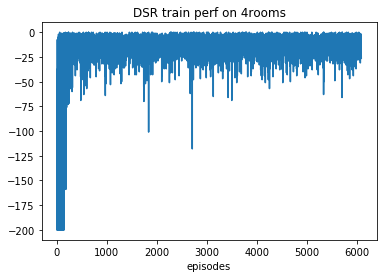

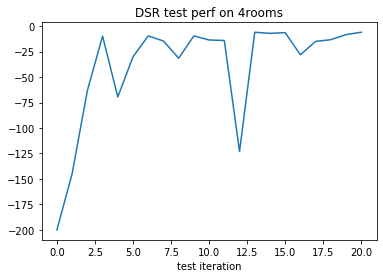

In [8]:
import matplotlib.pyplot as plt

plt.plot(returns_train)
plt.title('DSR train perf on 4rooms')
plt.xlabel('episodes')
plt.show()

plt.plot(returns_test)
plt.title('DSR test perf on 4rooms')
plt.xlabel('test iteration')
plt.show()